In [65]:
from __future__ import absolute_import, division, print_function, unicode_literals

try:
  %tensorflow_version 2.x
except Exception:
  pass

In [66]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import numpy as np
from IPython.display import Image

# in order to always get the same result
tf.random.set_seed(1)
np.random.seed(1)

In [67]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [68]:
x_train = x_train.reshape(60000, 784)

# select only 300 test data for visualization
x_test = x_test[:300]
y_test = y_test[:300]
x_test = x_test.reshape(300, 784)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# normalize data
gray_scale = 255
x_train /= gray_scale
x_test /= gray_scale

In [69]:
# MNIST input 28 rows * 28 columns = 784 pixels
input_img = Input(shape=(784,))
# encoder
encoder1 = Dense(128, activation='sigmoid')(input_img)
encoder2 = Dense(128, activation='sigmoid')(encoder1)
encoder3 = Dense(3, activation='sigmoid')(encoder2)
# decoder
decoder1 = Dense(128, activation='sigmoid')(encoder3)
decoder2 = Dense(128, activation='sigmoid')(decoder1)
decoder3 = Dense(784, activation='sigmoid')(decoder2)

# this model maps an input to its reconstruction
autoencoder = Model(inputs=input_img, outputs=decoder3)

In [70]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [71]:
autoencoder.fit(x_train, x_train,
                epochs=5,
                batch_size=32,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 300 samples
Epoch 1/5
60000/60000 [==============================] - 3s 48us/sample - loss: 0.2580 - val_loss: 0.2280
Epoch 2/5
60000/60000 [==============================] - 3s 44us/sample - loss: 0.2322 - val_loss: 0.2132
Epoch 3/5
60000/60000 [==============================] - 3s 45us/sample - loss: 0.2206 - val_loss: 0.2068
Epoch 4/5
60000/60000 [==============================] - 3s 42us/sample - loss: 0.2130 - val_loss: 0.1989
Epoch 5/5
60000/60000 [==============================] - 3s 43us/sample - loss: 0.2014 - val_loss: 0.1895


In [77]:
# create encoder model
encoder = Model(inputs=input_img, outputs=encoder3)
# create decoder model
encoded_input = Input(shape=(3,))
decoder_layer1 = autoencoder.layers[-3]
decoder_layer2 = autoencoder.layers[-2]
decoder_layer3 = autoencoder.layers[-1]
decoder = Model(inputs=encoded_input, outputs=decoder_layer3(decoder_layer1(encoded_input)))

In [78]:
# get latent vector for visualization
latent_vector = encoder.predict(x_test)
# get decoder output to visualize reconstructed image
reconstructed_imgs = decoder.predict(latent_vector)

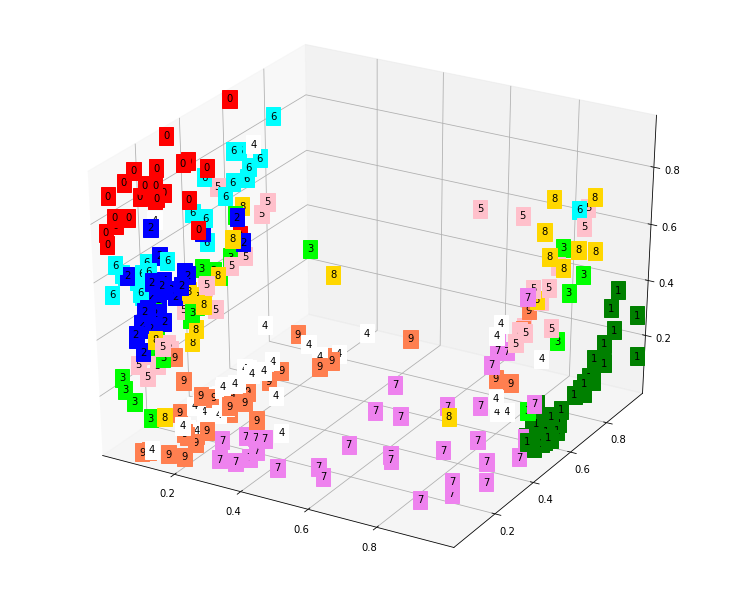

In [79]:
# visualize in 3D plot
from pylab import rcParams
rcParams['figure.figsize'] = 10, 8

fig = plt.figure(1)
ax = Axes3D(fig)

xs = latent_vector[:, 0]
ys = latent_vector[:, 1]
zs = latent_vector[:, 2]

color=['red','green','blue','lime','white','pink','aqua','violet','gold','coral']

for x, y, z, label in zip(xs, ys, zs, y_test):
    c = color[int(label)]
    ax.text(x, y, z, label, backgroundcolor=c)
    
ax.set_xlim(xs.min(), xs.max())
ax.set_ylim(ys.min(), ys.max())
ax.set_zlim(zs.min(), zs.max())

plt.show()

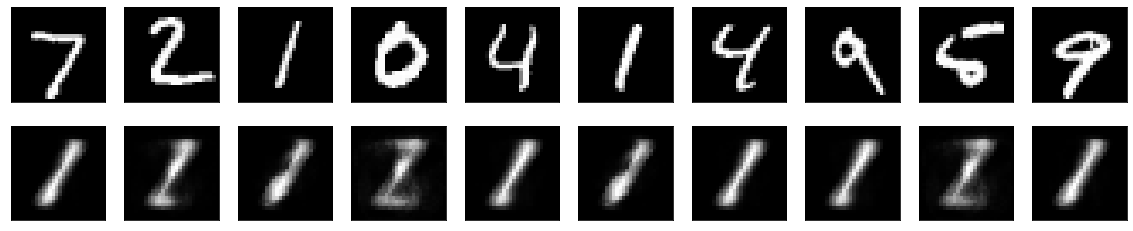

In [80]:
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstructed image
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(reconstructed_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()